# Import libraries

In [1]:
import numpy  as np
import pandas as pd
import scipy.stats as scps
import scipy  as scp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


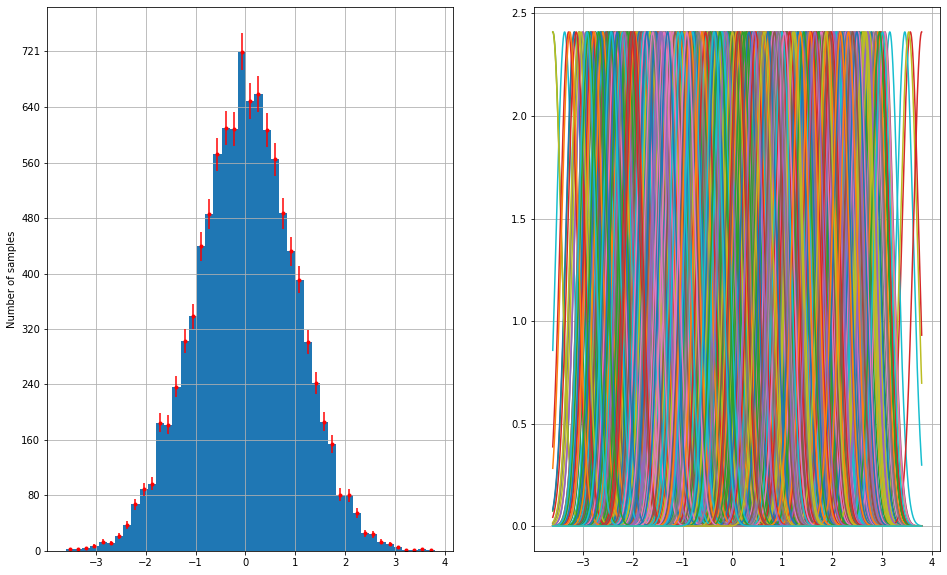

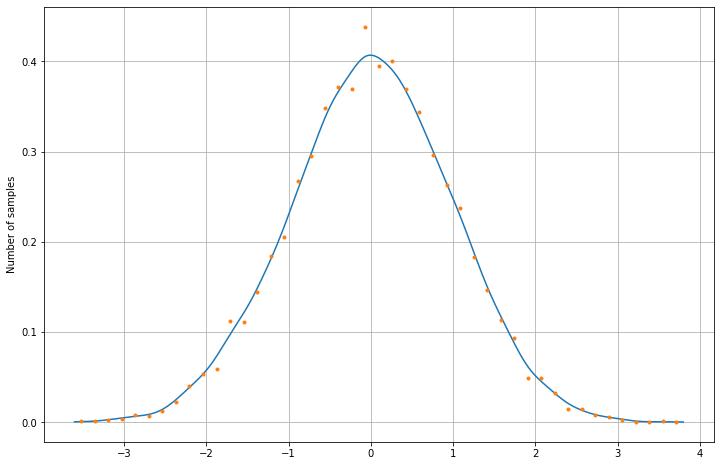

In [2]:
N = 10000
std = 1
x = np.random.normal(0,std,N)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

# This number of bins is compute according to this article 
# https://academic.oup.com/biomet/article-abstract/66/3/605/232642?redirectedFrom=fulltext
d = (max(x)-min(x))*(N**(1/3))/(3.49*std)

# plot
counts,bin_edges = np.histogram(x,int(d))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
ax1.set_ylabel('Number of samples')
ax1.set_yticks(np.linspace(0,max(counts)+1,10).astype(int))

ax1.hist(x,int(d))
ax1.errorbar(bin_centres, counts, yerr=err, fmt='.',color='r')
ax1.grid()

# Gaussians
g        = 1.06*x.std()*(x.size)**(-1/5)
gauss    = np.zeros((N,N))
gausstot = np.zeros(N) 
ran      = np.linspace(x.min(),x.max(),N)

for i in range(N):
    gausspnt     = scps.norm.pdf(ran,loc=x[i],scale=g)
    ax2.plot(ran,gausspnt)
    gauss[i,:]   = gausspnt
    
for i in range(N):
    gausstot[i]  = np.sum(gauss[:,i])
    
# Total Gaussian
gausstot /= scp.integrate.trapz(gausstot,dx=ran[1]-ran[0])
ax2.grid()
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ran,gausstot)

k = scp.integrate.trapz(counts,dx=bin_edges[1]-bin_edges[0])

counts =counts/k
err = np.sqrt(counts)/k
ax.set_ylabel('Number of samples')
ax.errorbar(bin_centres, counts, yerr=err, fmt='.')
ax.grid()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

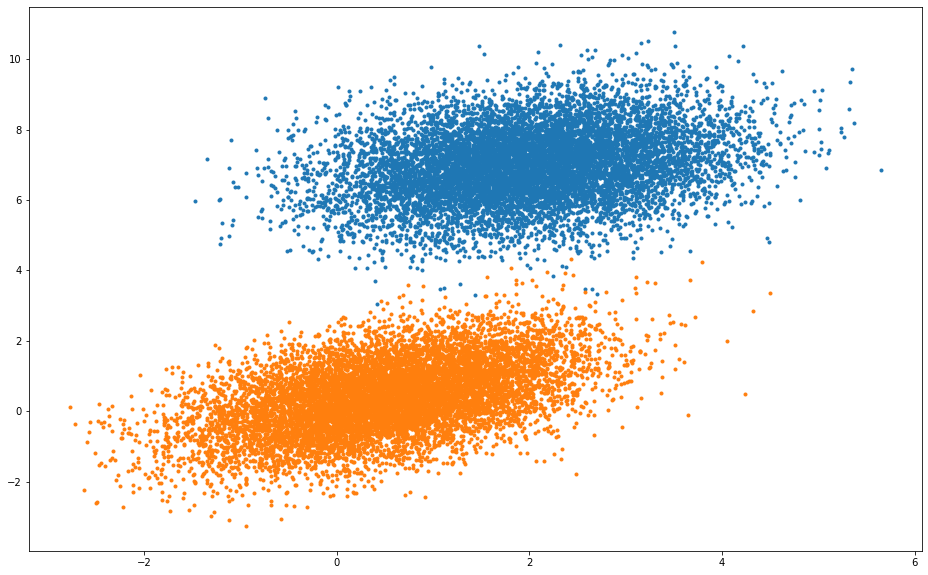

In [3]:
def random2d(x0=[0,0],mean=[1.,1.],covar=[[1.,.25],[.25,1.]],N=10000):
    """
    This function return a 2d gaussian with mean ,covar N points and 
    centered in x0
    """
    return np.random.multivariate_normal(mean, covar, N) +x0


fig ,ax = plt.subplots(figsize=(16,10))
x2 = random2d(x0=[1,6],N=10000)
ax.plot(x2[:,0],x2[:,1],'.')
x3 = random2d(mean=[.5,.4],covar=[[1.,0.5],[0.5,1.]],N=10000)
ax.plot(x3[:,0],x3[:,1],'.')

plt.show()


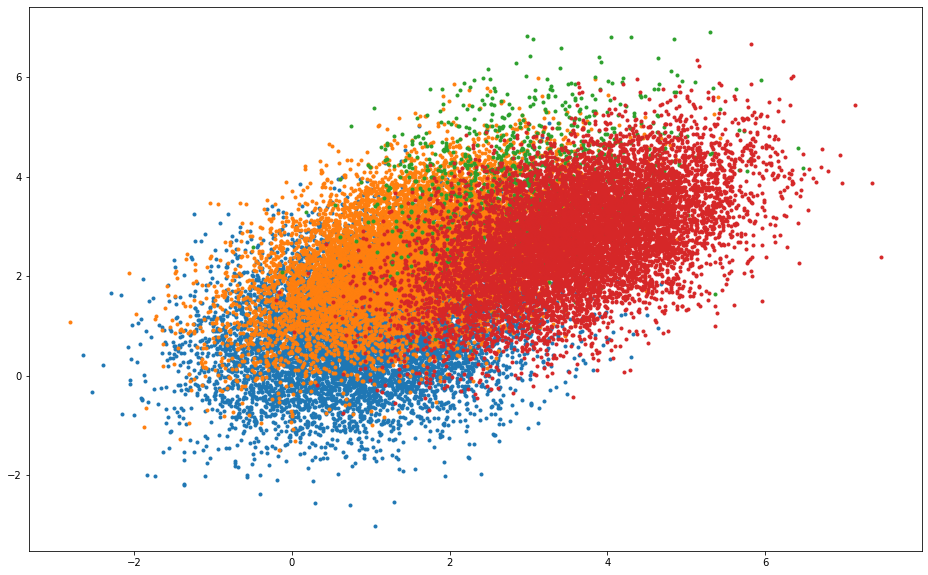

In [4]:
def plotnvar(*data):
    import matplotlib.pyplot as plt 
    import numpy as np
    fig ,ax = plt.subplots(figsize=(16,10))
    for x in data:
        ax.plot(x[:,0],x[:,1],'.')
    plt.show()
x2 = random2d(N=10000)
x3 = random2d(x0=[1,2],mean=[.5,.4],covar=[[1.,0.5],[0.5,1.]],N=10000)
x4 = random2d(x0=[2,1],mean=[1.,3.],N=1000)
x5 = random2d(x0=[3,2],mean=[.6,.8],covar=[[1.,0.5],[0.5,1.]],N=10000)
plotnvar(x2,x3,x4,x5)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
!  wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P ~/data/

(11131, 2)


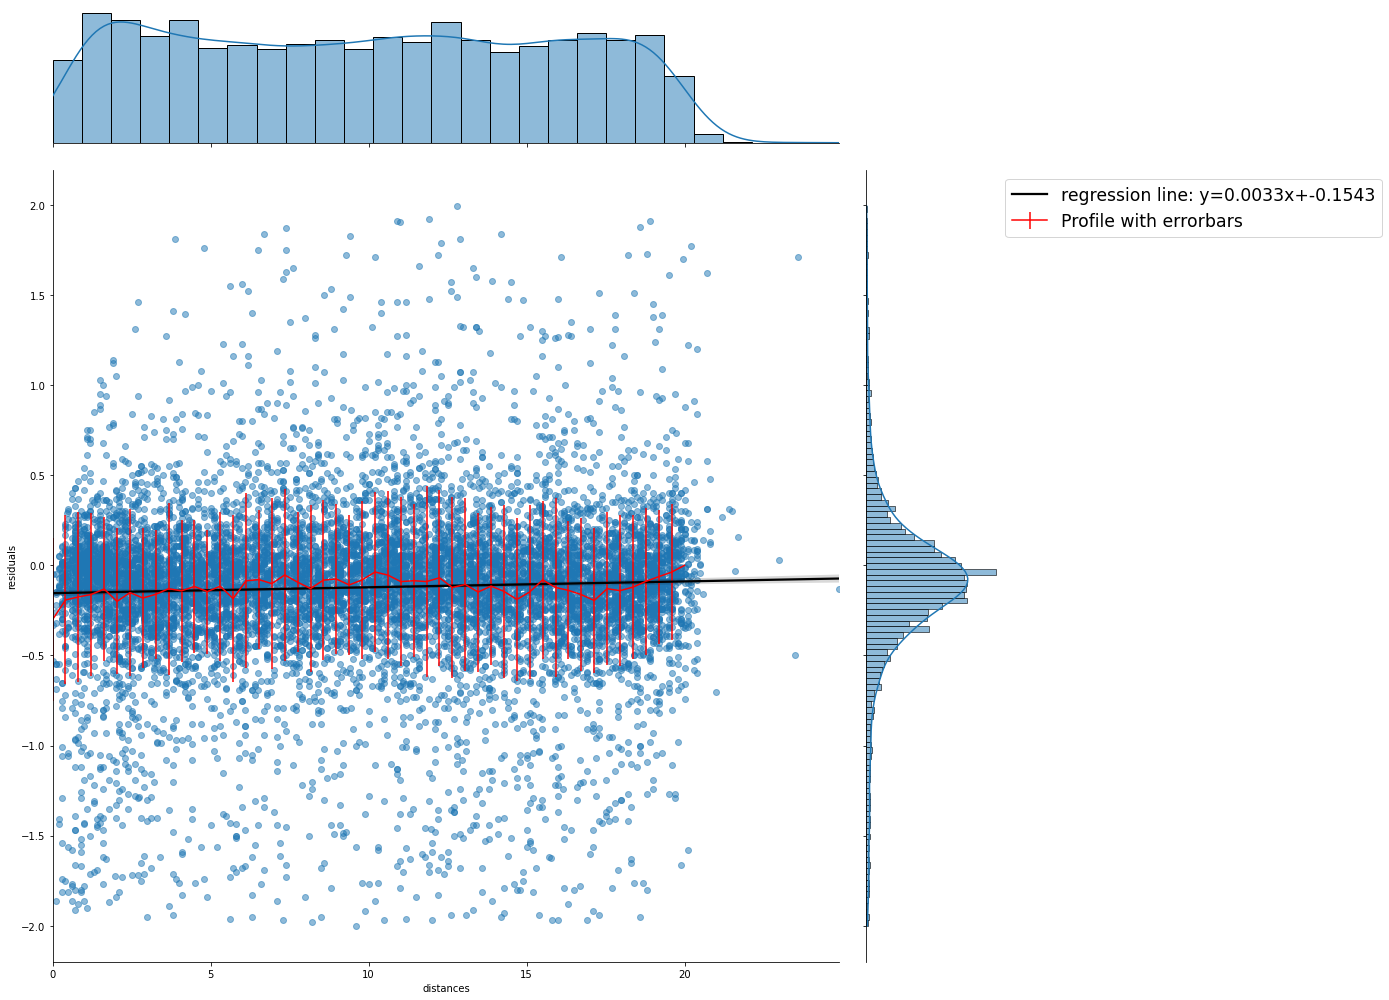

In [5]:
fin = np.load("/home/simone/data/residuals_261.npy",allow_pickle=True)

# Origin DataFrame
df  = pd.DataFrame(fin.item())
print(np.shape(df))

df = df[abs(df['residuals'])<2]


# Linear regression
slope, intercept, r_value, p_value, std_err = scps.linregress(df['distances'], df['residuals'])

# Seaborn Regression/plot
# In line_kws={'color':'black', 'label':'regression line: y={0:.5f}x+{1:.5f}'.format(slope,intercept)})
# i make the legend of the plot, the regression line is black because is more readable, the scatter point 
sns.jointplot(x="distances",y="residuals", data=df,kind="reg",height=14,
              scatter_kws = {'alpha':0.5},
              line_kws={'color':'black', 'label':'regression line: y={0:.4f}x+{1:.4f}'.format(slope,intercept)})

# 
x = np.linspace(0,20,50)
df = df.sort_values('distances')

y = np.zeros(len(x))
count = 0
prev = x[0]
erry = np.zeros(len(x))

for i in x[1:]:
    temp = df[df['distances'] < i]
    temp = temp[temp['distances']>=prev]
    y[count] = temp['residuals'].mean()
    erry[count] = temp['residuals'].std()
    count += 1
    prev = i
    
plt.errorbar(x,y,yerr=erry, color='red', label='Profile with errorbars')
plt.legend(bbox_to_anchor=(1.2, 1), fontsize='xx-large',loc='upper left')
